In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import librosa

In [41]:
def spectrogram(y, hop_length, n_fft, center=True):
    D_complex = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, center=center)
    D_amplitude = np.abs(D_complex)
    return D_amplitude

In [42]:
def focus_ENF(spectrogram, focus_freq, margin, fs, n_fft):
    # Get frequency bins
    freqs = librosa.fft_frequencies(sr=fs, n_fft=n_fft)

    # Find the index of the frequency bin closest to the focus frequency (e.g., 50 Hz)
    focus_idx = np.argmin(np.abs(freqs - focus_freq))

    # Extract frequency bins around the focus frequency within the margin (e.g., 1 Hz around 50 Hz)
    start_idx = np.argmin(np.abs(freqs - (focus_freq - margin)))
    end_idx = np.argmin(np.abs(freqs - (focus_freq + margin)))

    D_focus = spectrogram[start_idx+1:end_idx-1]

    return D_focus

In [12]:
from typing import List
from libhum.analysis import _signal_decimate, _signal_spectrums, _detect_enf

In [24]:
def compute_enf(
    signal: np.array, signal_frequency: float, network_frequency: float = 50.0,
    frequency_harmonics: List[int] = [1, 2, 3, 4, 5, 6, 7, 8],
):
    """
    Detects the ENF signal in the provided audio signal.

    Returns None if no ENF signal could be detected.
    """

    decimated_signal, decimated_frequency = _signal_decimate(signal, signal_frequency)

    spectrums = _signal_spectrums(
        decimated_signal, decimated_frequency, network_frequency, frequency_harmonics
    )

    # Computes the ENF signal for every harmonic
    print("hello")
    results = [
        _detect_enf(harmonic_spectrum, network_frequency, frequency_harmonic)
        for frequency_harmonic, harmonic_spectrum in zip(frequency_harmonics, spectrums)
    ]

    return results


In [27]:
from libhum.analysis import _detect_enf
from libhum.io import  read_audio
import audiofile

audio_file = "/Users/eyash.p24/Desktop/MUJ/ML/ATD_ML/dataset/Trial/Audio_01_00035_1290s_to_1320s.mp3"
data, frequency = audiofile.read(audio_file, always_2d=True)

audio, _ = librosa.load(audio_file)
audio = audio + audio
result = compute_enf(audio, frequency, network_frequency=60)

hello


In [31]:
len(result)

8

In [34]:
type(result[0])

libhum.types.AnalysisResult

In [43]:
audio1, sr = librosa.load(audio_file)
spec = spectrogram(audio1, 512, 1024)
d_focus = focus_ENF(spec, 50, 5, sr, 1024)

 ...]

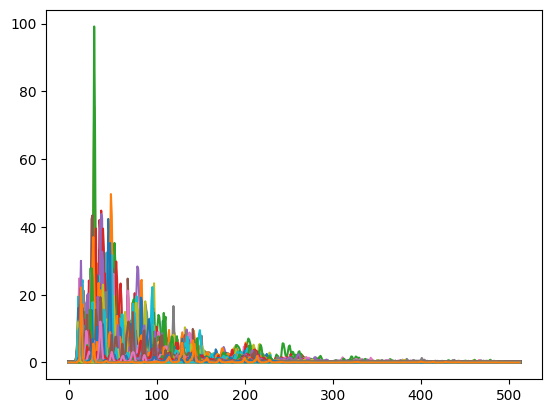

In [46]:
plt.plot(spec)

In [44]:
d_focus

array([], shape=(0, 1292), dtype=float32)

In [69]:

from pydub import AudioSegment

# Convert MP3 to WAV
def convert_mp3_to_wav(mp3_file, wav_file):
    audio = AudioSegment.from_mp3(mp3_file)
    audio.export(wav_file, format="wav")
    print(f"Converted {mp3_file} to {wav_file}")

# Example usage
mp3_filename = "/Users/eyash.p24/Desktop/MUJ/ML/ATD_ML/dataset/Trial/Audio_01_00026_450s_to_480s.mp3" # Replace with your MP3 file
wav_filename = "output.wav"
convert_mp3_to_wav(mp3_filename, wav_filename)


Converted /Users/eyash.p24/Desktop/MUJ/ML/ATD_ML/dataset/Trial/Audio_01_00026_450s_to_480s.mp3 to output.wav


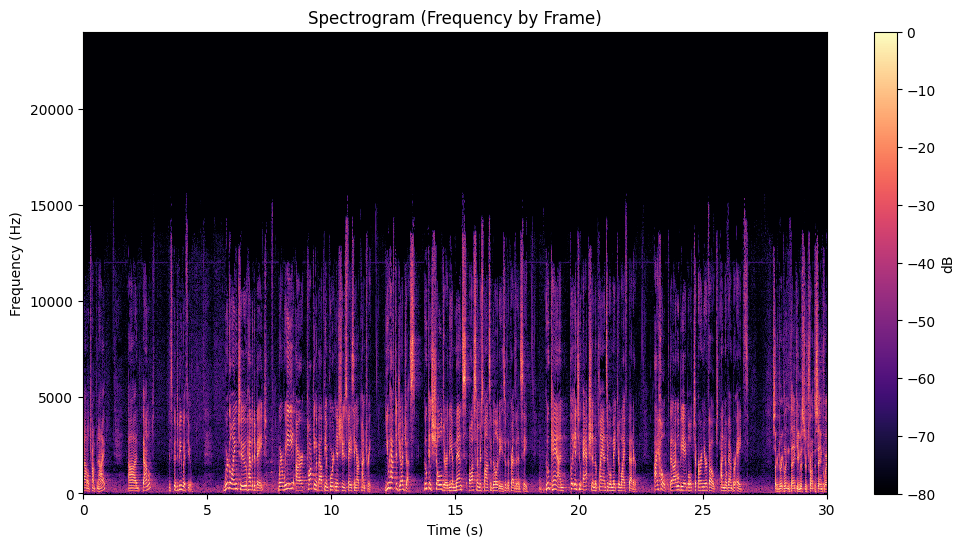

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load audio file
def load_audio(filename):
    y, sr = librosa.load(filename, sr=None)  # Load audio with original sample rate
    return y, sr

# Compute Short-Time Fourier Transform (STFT)
def compute_stft(y, sr, n_fft=2048, hop_length=512):
    stft_result = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    return stft_result, sr

# Plot Spectrogram (Frequency by Frame)
def plot_spectrogram(stft_result, sr, hop_length):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft_result, ref=np.max),
                             sr=sr, hop_length=hop_length, x_axis='time', y_axis='hz')
    plt.colorbar(label='dB')
    plt.title("Spectrogram (Frequency by Frame)")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

# Main function
def main():
    filename = "output.wav"  # Replace with your file
    y, sr = load_audio(filename)
    stft_result, sr = compute_stft(y, sr)
    plot_spectrogram(stft_result, sr, hop_length=512)

if __name__ == "__main__":
    main()


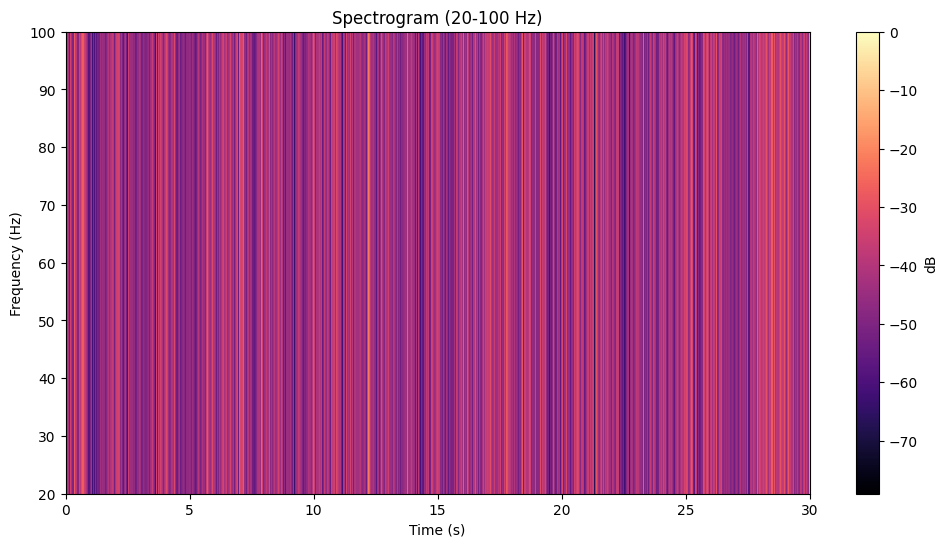

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load audio file
def load_audio(filename):
    y, sr = librosa.load(filename, sr=None)  # Load audio with original sample rate
    return y, sr

# Compute Short-Time Fourier Transform (STFT)
def compute_stft(y, sr, n_fft=2048, hop_length=512):
    stft_result = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    return stft_result, frequencies, sr

# Plot Spectrogram (Only 20-100 Hz)
def plot_spectrogram(stft_result, frequencies, sr, hop_length):
    # Find indices of frequencies between 20 and 100 Hz
    freq_mask = (frequencies >= 20) & (frequencies <= 100)
    stft_filtered = stft_result[freq_mask, :]  # Apply filter

    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft_filtered, ref=np.max),
                             sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
    
    plt.ylim([20, 100])  # Focus on the 20-100 Hz range
    plt.colorbar(label='dB')
    plt.title("Spectrogram (20-100 Hz)")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

# Main function
def main():
    filename = "output.wav"  # Replace with your file
    y, sr = load_audio(filename)
    stft_result, frequencies, sr = compute_stft(y, sr)
    plot_spectrogram(stft_result, frequencies, sr, hop_length=512)

if __name__ == "__main__":
    main()


[93.75 93.75 93.75 ... 93.75 93.75 93.75]


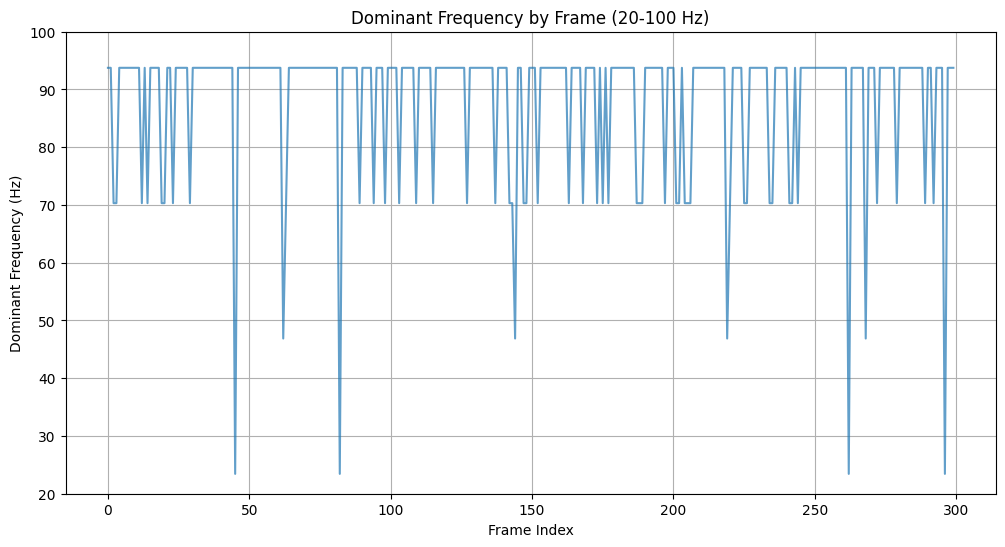

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load audio file
def load_audio(filename):
    y, sr = librosa.load(filename, sr=None)  # Load audio with original sample rate
    return y, sr

# Compute Short-Time Fourier Transform (STFT) and dominant frequency
def compute_dominant_frequencies(y, sr, n_fft=2048, hop_length=512):
    stft_result = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    
    # Find indices of frequencies between 20-100 Hz
    freq_mask = (frequencies >= 20) & (frequencies <= 100)
    stft_filtered = stft_result[freq_mask, :]  # Keep only 20-100 Hz data
    
    # Get dominant frequency per frame (argmax along frequency axis)
    dominant_freq_indices = np.argmax(stft_filtered, axis=0)
    dominant_frequencies = frequencies[freq_mask][dominant_freq_indices]
    
    return dominant_frequencies

# Plot Frequency by Frame
def plot_frequency_by_frame(dominant_frequencies):
    plt.figure(figsize=(12, 6))
    plt.plot(dominant_frequencies, alpha=0.7)
    plt.xlabel("Frame Index")
    plt.ylabel("Dominant Frequency (Hz)")
    plt.title("Dominant Frequency by Frame (20-100 Hz)")
    plt.ylim([20, 100])  # Focus on 20-100 Hz range
    plt.grid()
    plt.show()

# Main function

filename = "output.wav"  # Replace with your file
y, sr = load_audio(filename)
dominant_frequencies = compute_dominant_frequencies(y, sr)
print(dominant_frequencies)
plot_frequency_by_frame(dominant_frequencies[300:600])




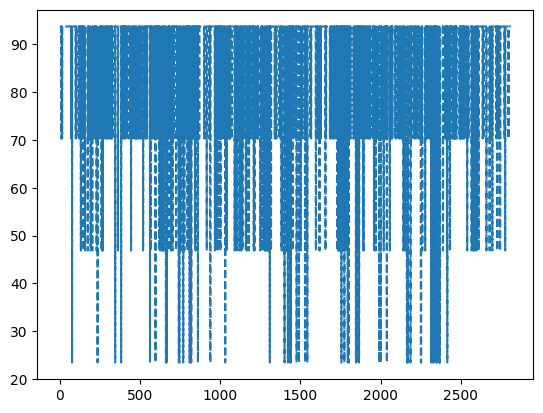

In [73]:
plt.plot(dominant_frequencies, linestyle="dashed")

<Axes: >

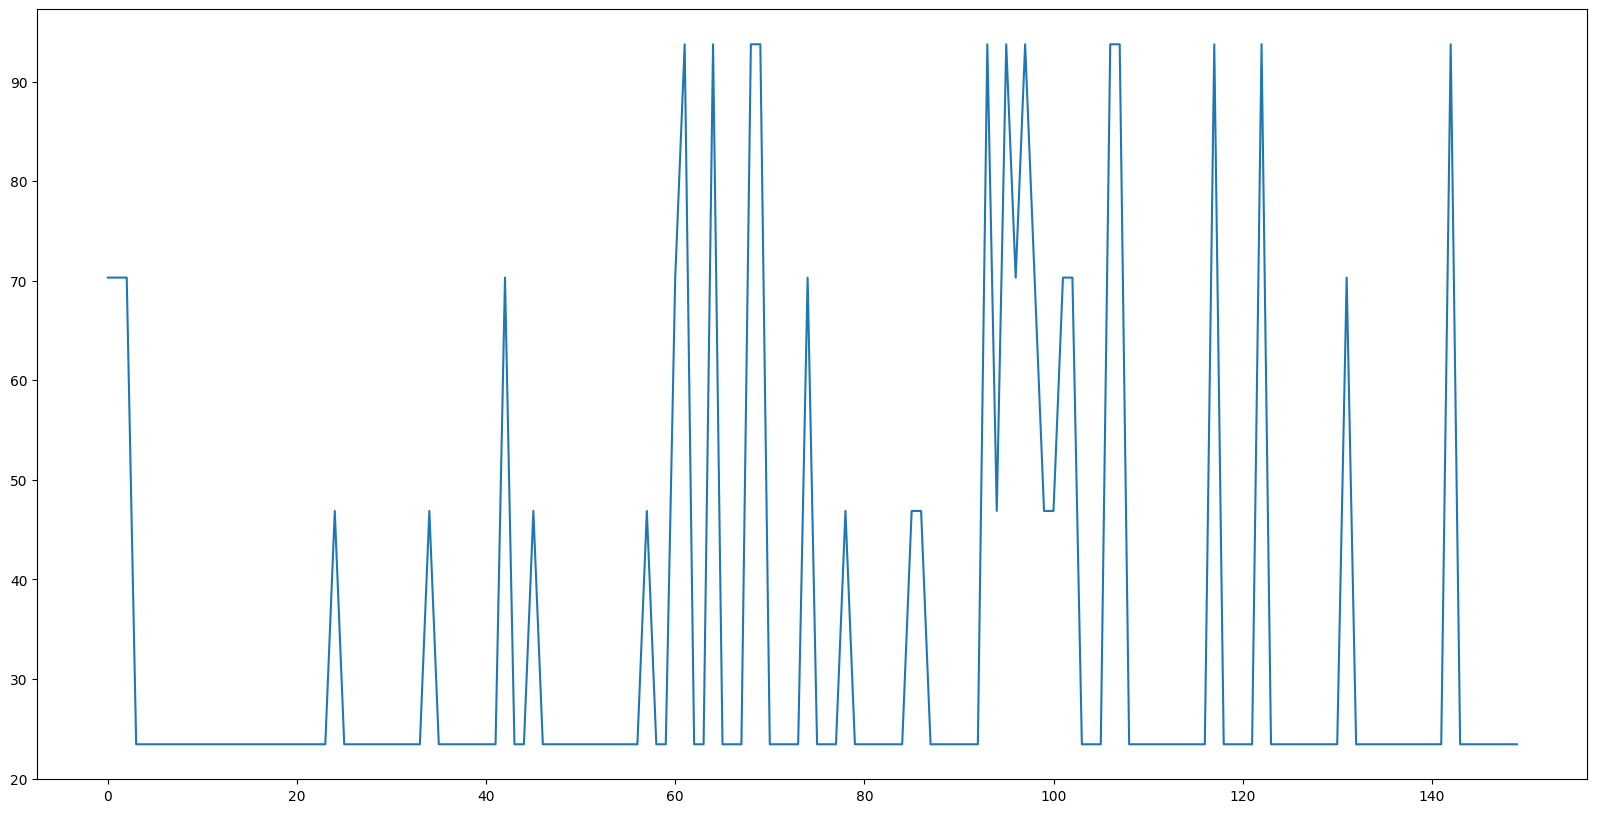

In [68]:
plt.figure(figsize=(20, 10))
sns.lineplot(dominant_frequencies[350:500])

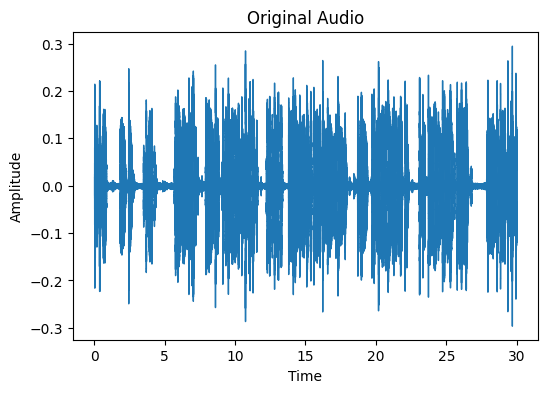

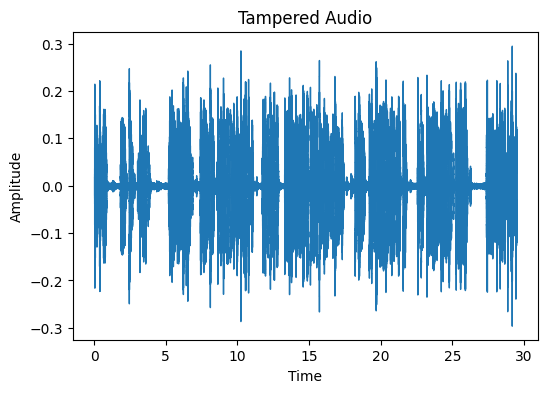

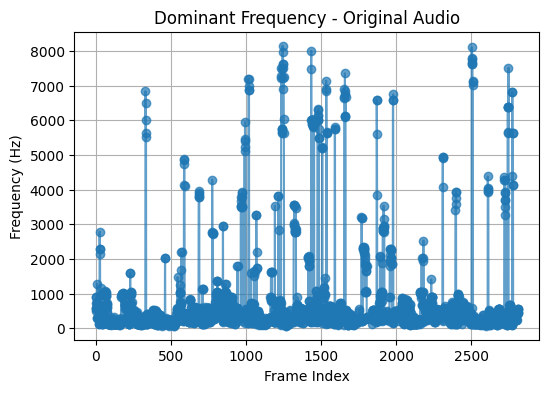

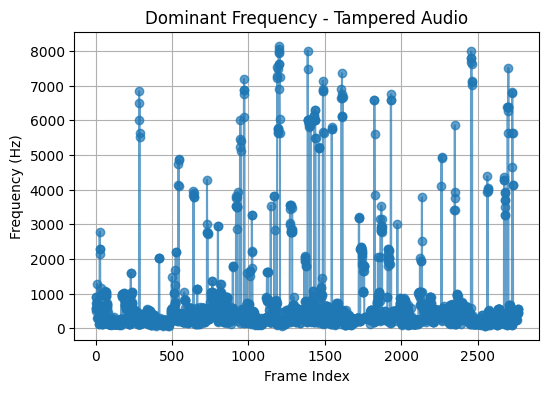

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
def load_audio(filename):
    y, sr = librosa.load(filename, sr=None)
    return y, sr

# Simulate tampering by deleting a segment
def tamper_audio(y, sr, start_sec, end_sec):
    start_sample = int(start_sec * sr)
    end_sample = int(end_sec * sr)
    y_tampered = np.concatenate((y[:start_sample], y[end_sample:]))  # Remove segment
    return y_tampered

# Compute STFT and extract dominant frequency per frame
def compute_dominant_frequencies(y, sr, n_fft=2048, hop_length=512):
    stft_result = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    
    # Get dominant frequency per frame
    dominant_freq_indices = np.argmax(stft_result, axis=0)
    dominant_frequencies = frequencies[dominant_freq_indices]
    
    return dominant_frequencies

# Plot waveform
def plot_waveform(y, sr, title):
    plt.figure(figsize=(6, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

# Plot frequency by frame
def plot_frequency_by_frame(dominant_frequencies, title):
    plt.figure(figsize=(6, 4))
    plt.plot(dominant_frequencies, marker="o", linestyle="-", alpha=0.7)
    plt.xlabel("Frame Index")
    plt.ylabel("Frequency (Hz)")
    plt.title(title)
    plt.grid()
    plt.show()

# Main function
def main():
    filename = "output.wav"  # Replace with your audio file
    y, sr = load_audio(filename)

    # Simulate deletion of audio segment (between 3s to 3.5s)
    y_tampered = tamper_audio(y, sr, start_sec=3.0, end_sec=3.5)

    # Compute dominant frequency per frame
    dominant_freq_original = compute_dominant_frequencies(y, sr)
    dominant_freq_tampered = compute_dominant_frequencies(y_tampered, sr)

    # Plot results
    plot_waveform(y, sr, "Original Audio")
    plot_waveform(y_tampered, sr, "Tampered Audio")
    plot_frequency_by_frame(dominant_freq_original, "Dominant Frequency - Original Audio")
    plot_frequency_by_frame(dominant_freq_tampered, "Dominant Frequency - Tampered Audio")

if __name__ == "__main__":
    main()
